# Project: TMDB-Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected tmdb-movies dataset which includes information about 10000 movies including user_ratings and revenues. This dataset is about the movies that we like to watch everyday and includes the different genres of the movies such as action, adventure and comedy. It also includes the original titles, casts, directors, production companies and other information. I selected this dataset because I watched many movies and when I opened this dataset in excel, I found that I can understand this data and I know the mean of every column in it.

When I explored this dataset, I have had two questions. The first is: Which genres are most popular from year to year? I mean by this question that if I select any two years from the release years of the movies, I would to know which genres have the most popularity between the two years and which genres have not. I mean by popularity that the genre is either a famous and the people prefer it or not.

The second question is: What kinds of properties are associated with movies that have high revenues? I mean which properties from the dataset that have high correlation and relationship with the high revenues. For example, maybe the high vote average is associated with the high revenue.

In [1]:
# Importing the libraries that I need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# the background of the plots
sns.set_style("darkgrid")
# magic line to view the plots on the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

I loaded the dataset by downloading it from the link that Udacity provided then I uploaded it to the notebook then I loaded it as a dataframe using `read_csv` method then I used `head` method to view the first five rows to take an idea and view the dataset.

In [2]:
df_movies = pd.read_csv("tmdb-movies.csv")
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I used `shape` method to know the number of rows and columns

In [3]:
df_movies.shape

(10866, 21)

I used `info` method to know the data types of each column and the number of non-null values in each column. From `info` method I discovered a wrong data type with `release_date` column and some columns have null values such as `keywords` column

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

I used `describe` method to display the statistics summary of the columns and I discovered from it that some movies in the dataset have zero values in the `budget`, `revenue`, `budget_adj`, `revenue_adj` and `runtime` columns

In [5]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I used `query` method to display the rows that have zero values in any column

In [6]:
df_movies.query("budget == 0 or revenue == 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.000000e+00,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.000000e+00
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.000000e+00


In [7]:
df_movies.query("runtime == 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [8]:
df_movies.query("id == 0 or vote_count == 0 or vote_average == 0 or release_year == 0")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


>I used `isnull` and `sum` methods to display the number of null values in each column

In [9]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

I used `duplicated` method in a boolean expression to display the rows that are duplicated in the data set

In [10]:
df_movies[df_movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning: (Handling missing values, dropping unnecessary columns, dropping duplicated rows, correcting wrong data types, creating new column that calculate the net profit for each movie and splitting the values in genres columns by |)

> I used `drop` method to drop the columns: `imdb_id`, `homepage`, `tagline` and `keywords` because they have null values and I will not need them in my analysis then I used `dropna` method to drop rows that have null values

In [11]:
df_movies = df_movies.drop(columns=["imdb_id", "homepage", "tagline", "keywords"])
df_movies = df_movies.dropna(axis=0)

I used `isnull` and `sum` method to verify that the dataset doesn't have null values any more.

In [12]:
df_movies.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

I used `query` and `index` method to extract the indices of the rows that have zero values in `budget`, `revenue`, or `runtime` columns and assign them to a variable then using this variable in `drop` method to drop them from the dataset then I used `reset_index` to reset the indices of the dataset with the argument `drop=True` to drop the old indices

In [13]:
no_budget_ind = df_movies.query("budget == 0 or revenue == 0 or runtime == 0").index
df_movies = df_movies.drop(index=no_budget_ind)
df_movies = df_movies.reset_index(drop=True)

I used `query` method to verify that the rows with zero values in `budget`, `revenue` or `runtime` method has dropped

In [14]:
df_movies.query("budget == 0 or revenue == 0 or runtime == 0")

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


I used a `for` loop to iterate on the dataset to modify the strings of `release_date` column to be on the format: `mm/dd/yyyy` to be able to be converted to datetime data type with the format: `yyyy-mm-dd` and give the correct value of the year

In [15]:
for i in range(df_movies.shape[0]):
    df_movies.release_date.values[i] = df_movies.release_date.values[i][:df_movies.release_date.values[i].rfind("/")+1] + str(df_movies.release_year.values[i])

I used `to_datetime` method to convert the data type of `release_date` column to datatime type and I used the argument `format` to determine the date format in the string to the method to identify it

In [16]:
df_movies.release_date = pd.to_datetime(df_movies.release_date, format="%m/%d/%Y")

I displayed the `release_date` column to ensure that the column has datetime data type

In [17]:
df_movies.release_date

0      2015-06-09
1      2015-05-13
2      2015-03-18
3      2015-12-15
4      2015-04-01
5      2015-12-25
6      2015-06-23
7      2015-09-30
8      2015-06-17
9      2015-06-09
10     2015-10-26
11     2015-02-04
12     2015-01-21
13     2015-07-16
14     2015-04-22
15     2015-12-25
16     2015-01-01
17     2015-07-14
18     2015-03-12
19     2015-11-18
20     2015-05-19
21     2015-06-15
22     2015-05-27
23     2015-02-11
24     2015-12-11
25     2015-07-23
26     2015-06-25
27     2015-01-24
28     2015-11-06
29     2015-09-09
          ...    
3776   1965-03-02
3777   1965-12-22
3778   1965-06-03
3779   1965-02-15
3780   1969-12-12
3781   1969-09-23
3782   1969-05-25
3783   1969-06-17
3784   1978-07-07
3785   1978-06-16
3786   1978-09-02
3787   1978-12-14
3788   1978-10-25
3789   1978-07-27
3790   1978-12-08
3791   1978-10-06
3792   1978-11-15
3793   1978-10-06
3794   1978-04-26
3795   1978-11-01
3796   1978-06-27
3797   1978-12-19
3798   1978-10-24
3799   1978-06-09
3800   197

I used `drop_duplicates` column and assigned the result of dropping to the dateframe to drop the duplicates from the dataset then I used `reset_index` column with the argument: `drop=True` to reset the indices of the rows and drop the old indices and assigned the result to the dataframe

In [18]:
df_movies = df_movies.drop_duplicates()
df_movies = df_movies.reset_index(drop=True)

I used `duplicated` and `sum` method to ensure the dataframe has not duplicated rows

In [19]:
df_movies.duplicated().sum()

0

I subtracted the column `budget_adj` from the column`revenue_adj` to get the net profit of the movie and assign the result to a new column called `net_profit_adj`

In [20]:
df_movies["net_profit_adj"] = df_movies["revenue_adj"] - df_movies["budget_adj"]
df_movies["net_profit_adj"]

0       1.254446e+09
1       2.101614e+08
2       1.704191e+08
3       1.718723e+09
4       1.210949e+09
5       3.661143e+08
6       2.627551e+08
7       4.483897e+08
8       9.961120e+08
9       6.244116e+08
10      5.848204e+08
11      7.348699e+06
12      2.011985e+07
13      1.431861e+08
14      1.035032e+09
15      1.028193e+08
16      2.555496e+08
17      3.575138e+08
18      4.115631e+08
19      4.512814e+08
20      1.751281e+07
21      5.677302e+07
22      3.316514e+08
23      4.872791e+08
24      9.691874e+07
25      4.897435e+08
26      1.360345e+08
27      2.969778e+08
28      6.287873e+07
29      2.302363e+08
            ...     
3775    1.072786e+09
3776    6.762907e+08
3777    1.685157e+08
3778   -5.536451e+07
3779    4.456682e+08
3780    5.724855e+08
3781    2.448148e+08
3782   -3.332025e+07
3783    5.876928e+08
3784    5.611860e+08
3785    1.816758e+08
3786    8.196904e+08
3787    2.329862e+08
3788    4.622955e+08
3789    1.169945e+08
3790    1.093063e+08
3791    8.848

I used a `for` loop to iterate on the dataset to split the values of the `genres` column such that each value becomes a list that contains the genres that the movie belongs to.

In [21]:
for i in range(len(df_movies.index)):
    df_movies.genres.values[i] = df_movies.genres.values[i].split("|")

I displayed the first value of the `genres` column to ensure that this value is a list of genres

In [22]:
df_movies.genres[0]

['Action', 'Adventure', 'Science Fiction', 'Thriller']

<a id='eda'></a>
## Exploratory Data Analysis

### What kinds of properties are associated with movies that have high revenues?

I used `plt.scatter` method to make a scatter plot between the `vote_average` column and `net_profit_adj` column then I used `xlabel` column to make _vote average_ a label for x-axis then I used `ylabel` column to make _net profit adj by billions_ a label for y-axis then I used `title` method to make _Relation between vote average and net profit adj_ a title for the scatter plot then I used `corr` method to calculate the correlation between the two columns and displayed the result in a string using `format` method inside a `print` function

The correlation between vote average and net profit adj: 0.29019530067700816


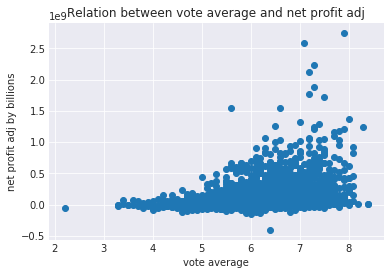

In [23]:
plt.scatter(x=df_movies.vote_average.values, y=df_movies.net_profit_adj.values)
plt.xlabel("vote average")
plt.ylabel("net profit adj by billions")
plt.title("Relation between vote average and net profit adj");
print("The correlation between vote average and net profit adj: {}".format(df_movies.net_profit_adj.corr(df_movies.vote_average)))

I used `plt.scatter` method to make a scatter plot between the `vote_count` column and `net_profit_adj` column then I used `xlabel` column to make _vote count_ a label for x-axis then I used `ylabel` column to make _net profit adj by billions_ a label for y-axis then I used `title` method to make _Relation between vote count and net profit adj_ a title for the scatter plot then I used `corr` method to calculate the correlation between the two columns and displayed the result in a string using `format` method inside a `print` function

The correlation between vote count and net profit adj: 0.6127916439603353


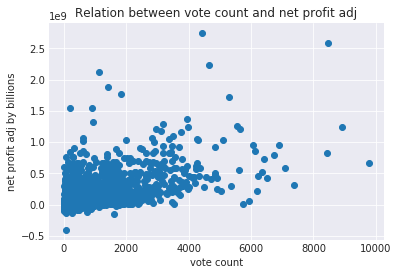

In [24]:
plt.scatter(x=df_movies.vote_count.values, y=df_movies.net_profit_adj.values)
plt.xlabel("vote count")
plt.ylabel("net profit adj by billions")
plt.title("Relation between vote count and net profit adj");
print("The correlation between vote count and net profit adj: {}".format(df_movies.net_profit_adj.corr(df_movies.vote_count)))

I used `plt.scatter` method to make a scatter plot between the `popularity` column and `net_profit_adj` column then I used `xlabel` column to make _popularity_ a label for x-axis then I used `ylabel` column to make _net profit adj by billions_ a label for y-axis then I used `title` method to make _Relation between popularity and net profit adj_ a title for the scatter plot then I used `corr` method to calculate the correlation between the two columns and displayed the result in a string using `format` method inside a `print` function

The correlation between popularity and net profit adj: 0.5151251162014844


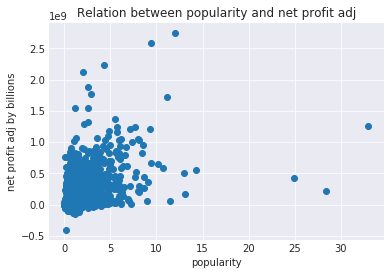

In [25]:
plt.scatter(x=df_movies.popularity.values, y=df_movies.net_profit_adj.values)
plt.xlabel("popularity")
plt.ylabel("net profit adj by billions")
plt.title("Relation between popularity and net profit adj");
print("The correlation between popularity and net profit adj: {}".format(df_movies.net_profit_adj.corr(df_movies.popularity)))

I used `plt.scatter` method to make a scatter plot between the `runtime` column and `net_profit_adj` column then I used `xlabel` column to make _runtime_ a label for x-axis then I used `ylabel` column to make _net profit adj by billions_ a label for y-axis then I used `title` method to make _Relation between vote average and net profit adj_ a title for the scatter plot then I used `corr` method to calculate the correlation between the two columns and displayed the result in a string using `format` method inside a `print` function

The correlation between runtime and net profit adj: 0.23449147687282287


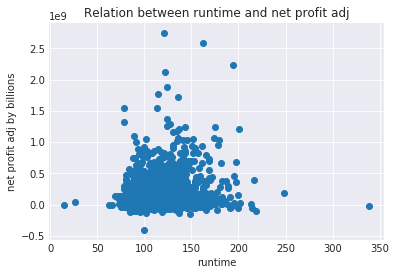

In [26]:
plt.scatter(x=df_movies.runtime.values, y=df_movies.net_profit_adj.values)
plt.xlabel("runtime")
plt.ylabel("net profit adj by billions")
plt.title("Relation between runtime and net profit adj");
print("The correlation between runtime and net profit adj: {}".format(df_movies.net_profit_adj.corr(df_movies.runtime)))

### Which genres are most popular from year to year?

I created a dictionary object using `dict()` constructor then I used an outer for loop and an inner to fill the dictionary with keys that represents the genres of the movies and the values which are the number of the movies in each genre using `get` method

In [27]:
genres = dict()
for i in range(len(df_movies.index)):
    for genre in df_movies.genres.values[i]:
        genres[genre] = genres.get(genre, 0) + 1

I used a for loop to convert the list of genres into a string using `join` method with the pipeline _|_

In [28]:
for i in range(len(df_movies.index)):
    df_movies.genres.values[i] = "|".join(df_movies.genres.values[i])

In `genres_indices` function: I created a dictionary using `dict()` constructor then I used an outer for loop on genre_list and an inner for loop on the length of the dataframe to make a list for indices of each genre then add these lists as values of the dictionary then returning it.

In `genres_data` function: I created a dictionary using `dict()` constructor then I used a for loop on the dictionary returned from the previous function to add the dataframes of each genre as values of the new dictionary then returning it.

In `genres_popularity` function: I created a dictionary using `dict()` constructor then I used a for loop to add a series of release years and the popularity means on these years in each genre as values in the new dictionary using `groupby` and `mean` methods then returning it.

In `most_popular_genre` function: I created a dictionary using `dict()` constructor then I asked the user to enter the two years that he would like to know the most popular genre between then I used `if` statement to return `None` if he entered the start year less than 1960 or the end year greater than 2015 then I subtracted start year from end year and assigned the result to the variable `years` then I used an outer `for` loop on the dictionary that returned by `genres_popularity` function, inside it I created `popularity` variable with a value of 0 and an inner `for` loop that on the range between start year and end year + 1 using `range` function, inside it I summed the values of the popularity means in each year in the one genre and assigned it to the variable then I calculated the mean of it by dividing popularity on the number of years between start and end then I assigned the popularity mean as a value of the key which represents the genre to the new dictionary and for avoiding the errors I used `try` and `except` blocks then I used `np.arange` method to determine the location of the bars in the bar plot then I used `plt.bar` method to create the bar plot of the popularity of genres between two years then I determined the figsize, xticks which are the genres, xlabel which is _Genres of Movies_, ylabel which is _Popularity Mean_ and a title which is _Genres Popularity From Year to Year_ for the plot.

In [32]:
def genres_indices(df, genre_list):
    """
    Return a dictionary that contains the genres as the keys.
    and the indices of each genre as a value.
       
    INPUT: df: dataframe, genre_list: a list of genres.
    OUTPUT: genres_inds_dict: a dictionary of indices of each genre.
    """
    genres_inds_dict = dict()
    for genre in genre_list:
        genre_inds = []
        for i in range(len(df.index)):
            if(genre in df.genres.values[i]):
                genre_inds.append(i)
        genres_inds_dict[genre] = genre_inds
    return genres_inds_dict


def genre_data(df, genres_inds_dict):
    """
    Return a dictionary that contains the genres as the keys
    and dataframes that contains the movies of the genre as the dictionary values.
       
    INPUT: df: dataframe, genres_inds_dict: the dictionary of indices of the genres.
    OUTPUT: genres_data: Dictionary of dataframes of genres.
    """
    genres_data = dict()
    for key, value in genres_inds_dict.items():
        genres_data[key] = df.iloc[value, :]
    return genres_data



def genres_popularity(genres_data_dict):
    """
    Return a dictionary that contains the genres as the keys
    and series that contains release_years of the movies as
    the series indices and the popularity mean as the series values
    and the series are the dictionary values.
       
    INPUT: df: dataframe, genres_inds_dict: the dictionary of indices of the genres.
    OUTPUT: genres_data: Dictionary of series of genres.
    """
    genres_popularity = dict()
    for genre in genres_data_dict:
        genres_popularity[genre] = genres_data_dict[genre].groupby(['release_year']).mean()["popularity"]
    return genres_popularity


def most_popular_genres(genres_popularity_dict):
    """
    Prints a plot of the popularity of the genres between two years
    that are specified as user inputs
    if the start_year < 1960 or end_year > 2015
    return None.
       
    INPUT: genres_popularity_dict: a dictionary of genres and the popularity_mean
    of each release_year in each genre.
    """
    genres_popular_in_years = dict()
    start_year = int(input("Enter the start year:"))
    end_year = int(input("Enter the end year:"))
    if(start_year < 1960 or end_year > 2015):
        print("The films are released between 1960 and 2015!")
        return None
    years = end_year - start_year + 1
    for genre in genres_popularity_dict:
        popularity = 0
        for year in range(start_year, end_year+1):
            try:
                popularity += genres_popularity_dict[genre][year]
                popularity_mean = popularity / years
                genres_popular_in_years[genre] = popularity_mean
            except:
                continue
    x = np.arange(len(genres_popular_in_years.keys()))
    width = 0.35
    plt.figure(figsize=(27,8))
    plt.bar(x, list(genres_popular_in_years.values()), width)
    plt.xticks(x, list(genres_popular_in_years.keys()), fontsize=10)
    plt.xlabel("Genres of Movies", fontsize=30)
    plt.ylabel("Popularity Mean", fontsize=30)
    plt.title("Genres Popularity From Year to Year", fontdict={'fontsize': 30})

I assigned the keys of the dictionary genres to the variable genres_keys then I converted it using `list()` constructor then I called the four functions

Enter the start year:1984
Enter the end year:2011


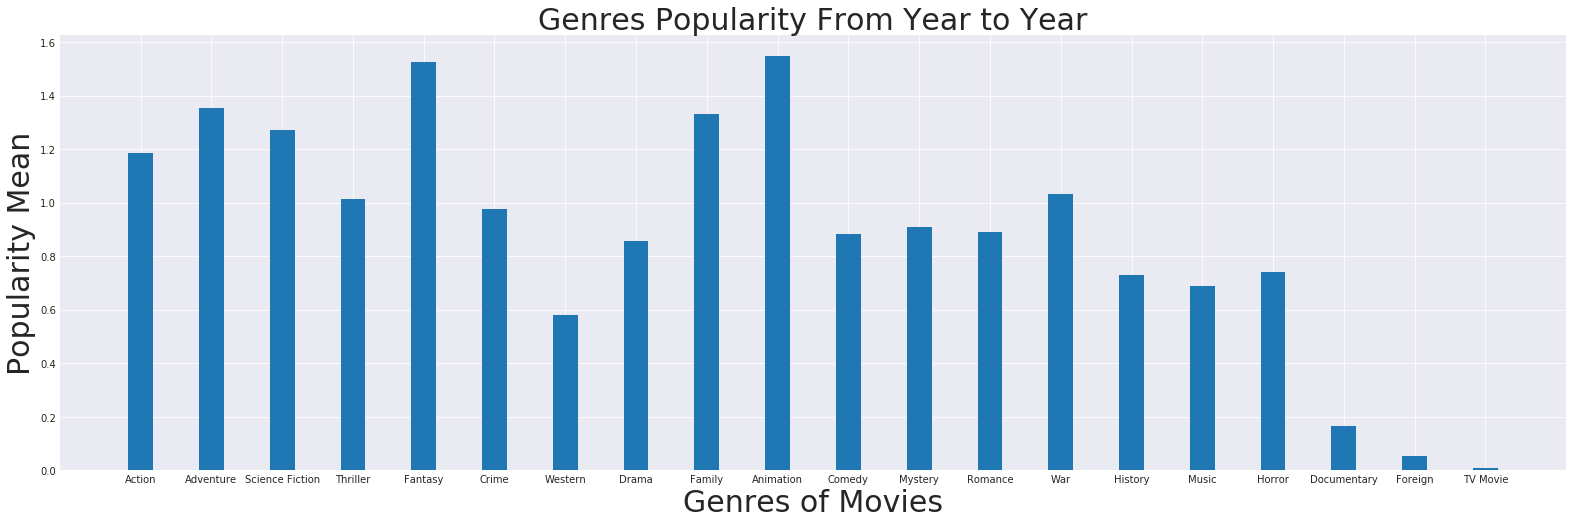

In [33]:
genres_keys = genres.keys()
genres_keys = list(genres_keys)
movies_genres_inds_dict = genres_indices(df_movies, genres_keys)
movies_genres_data = genre_data(df_movies, movies_genres_inds_dict)
genres_pop = genres_popularity(movies_genres_data)
most_popular_genres(genres_pop)

### What is the distribution of the net profit adj between the movies?

I calculated the mean and the median of `net_profit_adj` column and displayed them in two strings using `format` method inside `print` function then I used `plt.hist` method to plot the distribution of the net profit adj between the movies then I used `xlabel` method to give the x-axis the label: _Net Profit Adj by Billions_ then I used `ylabel` method to give the y-axis the label: _Number of Movies_ then I used `title` method to give the plot the title: _Distribution of Net Profit Between Movies_

The mean of net profit adj: 93996169.0531615
The median of net profit adj: 28513340.199803103


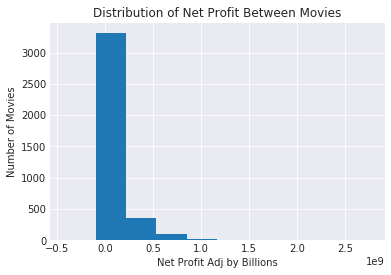

In [46]:
print("The mean of net profit adj: {}".format(df_movies.net_profit_adj.mean()))
print("The median of net profit adj: {}".format(df_movies.net_profit_adj.median()))
plt.hist(df_movies.net_profit_adj)
plt.xlabel("Net Profit Adj by Billions")
plt.ylabel("Number of Movies")
plt.title("Distribution of Net Profit Between Movies");

<a id='conclusions'></a>
## Conclusions

I found that the relationships between the column `runtime` and the column `net_profit_adj` is so weak relationship which means that it is not necessary that if the vote counts on a movie are big, then the net profit adj is big and vice versa because the correlation between them is about 0.23, the relationship between the column `vote_average` and the column `net_profit_adj` is a weak relationship because the correlation between them is about 0.29, the relationship between the colum `vote_count` and `net_profit_adj` is moderate relationship because the correlation between them is about 0.61 and so on between the column `popularity` and the column `net_profit_adj` because the correlation between them is about 0.52.

I found that the histogram plot of `net_profit_adj` column is right skewed which means that the mean of that column is greater than the median. To verify that I calculated them using the methods: `mean` and `median` and I found that the mean is about 94 millions and the median is about 28.5 millions and this difference between them is so big which means that few movies earned big profits.

By calling the four functions: `genres_indices`, `genres_data`, `genres_popularity` and `most_popular_genres` and entering the start year and the end year by the user in the last function, the user can determine the most popular genres between them by looking at the tallest bars in the plot. For example, if the start year = 1984 and the end year = 2011 then the most popular genres between the two years are Animation and Fantasy.

### Limitations
1. I would like to know the type of the movies based on the targeted age, some movies are made for family which means they are appropriate for kids and some of them may have bloody scenes or horror scenes which are just for adults so I wanted to know the number of movies for each targeted ages but this variable isn't exist in the dataset.

2. When I handled the missing values I dropped more than half of the data which of course affects on my analysis and getting the appropriate values for these missing values is not easy. It requires web scraping which requires more time to study and this topic is beyond this course.

3. Also I wanted to know the notes of movie critics about the movies such as: what are the reasons of the low popularities for some genres of the movies between any two years, also what are the reasons of failure of some movies and why are they losing money and so on.

In [31]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])